1 Phân tích hồi quy
Dữ liệu
Tập dữ liệu ToyotaCorolla.csv là thông tin liên quan đến giá bán xe Toyota đã qua sử dụng của
công ty kinh doanh xe cũ được ghi nhận trong tháng 8 năm 2004.
Biến vs Mô tả ( 
Price : Giá xe
Age : Tuổi xe (tính đến 8/2004)
Kilometers : Quãng đường đã đi
Fuel_type : Loại nhiên liệu
HP : Động cơ
Metallic : Màu metallic? (Yes = 1, No = 0)
Color : Màu
Automatic : Xe tự động (Yes = 1, No = 0)
CC : Dung tích
Doors : Số cửa
Quarterly_Tax : Thuế
Weight : Trọng lượng )
1. Hãy trực quan hóa các thông tin thống kê mô tả cho các biến.
2. Tìm và trực quan mối quan hệ tương quan giữa các cặp biến (nếu có).
3. Hãy đưa ra mô hình dự báo về giá xe Price (có thể sử dụng mô hình hồi quy logistic hoặc
mô hình học máy bất kỳ).

In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## 1. Hãy trực quan hóa các thông tin thống kê mô tả cho các biến.

In [231]:
df = pd.read_csv("ToyotaCorolla.csv")
df

,Price,Age,Kilometers,Fuel_Type,HP,Metallic,Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,1,Blue,0,1300,3,69,1025
1432,10845,72,19000,Petrol,86,0,Grey,0,1300,3,69,1015
1433,8500,71,17016,Petrol,86,0,Blue,0,1300,3,69,1015
1434,7250,70,16916,Petrol,86,1,Grey,0,1300,3,69,1015


In [217]:
df.isnull().sum()


Price            0
Age              0
Kilometers       0
Fuel_Type        0
HP               0
Metallic         0
Color            0
Automatic        0
CC               0
Doors            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [218]:
df.describe()

,Price,Age,Kilometers,HP,Metallic,Automatic,CC,Doors,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,283.000000,1615.00000


## 2. Tìm và trực quan mối quan hệ tương quan giữa các cặp biến (nếu có).

<AxesSubplot:>

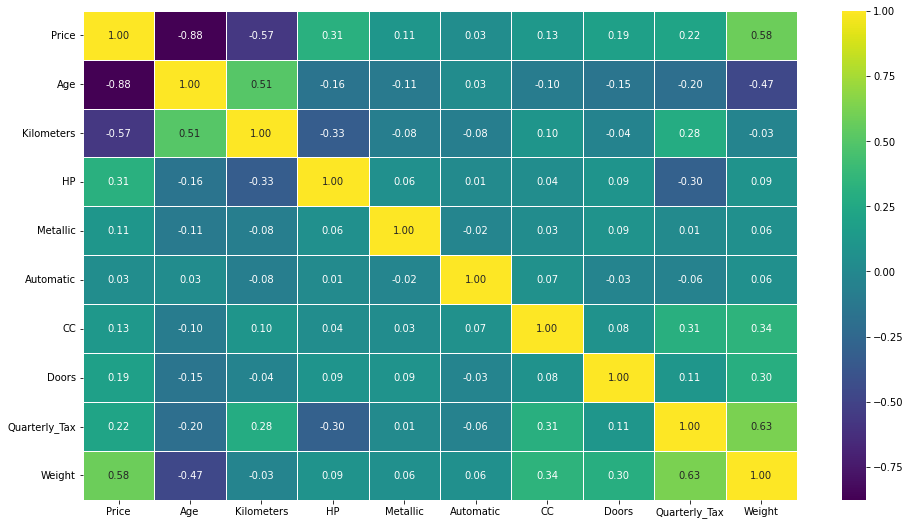

In [219]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap='viridis',linewidths=.5,annot=True,fmt='.2f')

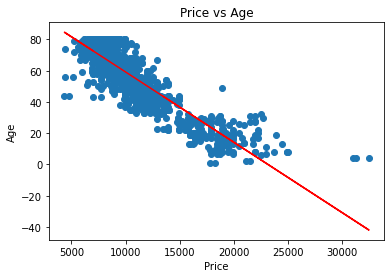

In [220]:
# Age Vs Price
plt.scatter(df.Price, df.Age)
plt.xlabel("Price")
plt.ylabel("Age")
plt.title("Price vs Age")

z = np.polyfit(df.Price, df.Age, 1)
p = np.poly1d(z)
plt.plot(df.Price,p(df.Price),"r")


plt.show()

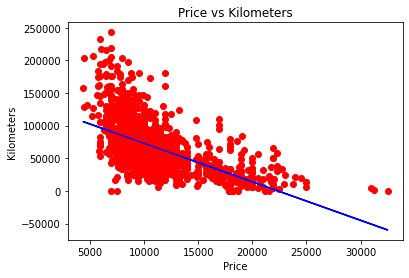

In [221]:
# Price VS Kilometers



plt.scatter(df.Price, df.Kilometers, color='red')
plt.xlabel("Price")
plt.ylabel("Kilometers")
plt.title("Price vs Kilometers")

z = np.polyfit(df.Price, df.Kilometers, 1)
p = np.poly1d(z)
plt.plot(df.Price,p(df.Price),"b")

plt.show()

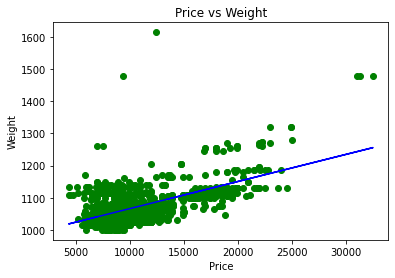

In [222]:
# Price VS Weight
plt.scatter(df.Price, df.Weight, color='green')
plt.xlabel("Price")
plt.ylabel("Weight")
plt.title("Price vs Weight")

z = np.polyfit(df.Price, df.Weight, 1)
p = np.poly1d(z)
plt.plot(df.Price,p(df.Price),"b")


plt.show()

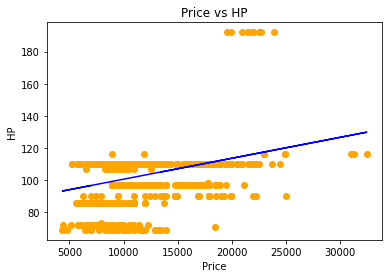

In [223]:
# Price VS HP
plt.scatter(df.Price, df.HP, color='orange')
plt.xlabel("Price")
plt.ylabel("HP")
plt.title("Price vs HP")

z = np.polyfit(df.Price, df.HP, 1)
p = np.poly1d(z)
plt.plot(df.Price,p(df.Price),"b")

plt.show()

## 3. Hãy đưa ra mô hình dự báo về giá xe Price (có thể sử dụng mô hình hồi quy logistic hoặc mô hình học máy bất kỳ).

### Sử dụng mô hình : Decision Tree Regression

In [224]:
dataset = pd.get_dummies(df)

In [225]:
X = dataset.drop('Price', axis = 1).values
y = dataset.iloc[:, 0].values.reshape(-1,1)

In [226]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [227]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 22)
Shape of X_test:  (359, 22)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


In [228]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [229]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8060203012401743
R2_score (train):  1.0
R2_score (test):  0.8593880338470665
RMSE:  1412.589339990232
